## 문제
1. 각 그룹에 대한 표본평균을 구한다.
2. 귀무가설, 대립가설을 설정하세요.
3. 정규성 검정, 등분산성 검정 코드를 작성하시고, 결과를 해석하세요.
4. t-test 진행하고, t-통계량, p-value 구하세요.
5. 가설검정의 결과를 귀무가설을 기준으로 채택/기각 여부를 판단 내려주세요.
6. 조건: pingouin 라이브러리 사용 안함
라이브러리만 사용
---> 40분까지 개별적으로 .ipynb 파일을 제출(Slack)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/멀티캠퍼스 국비지원 교육/정지훈 강사님 수업/통계/data'
df = pd.read_csv(DATA_PATH + '/toothgrowth.csv')
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


## 1. 각 그룹에 대한 표본평균을 구한다.

In [ ]:
# 표본 평균
df.groupby('supp')['len'].agg(['mean', 'std', 'count']).reset_index()

,supp,mean,std,count
0,OJ,20.663333,6.605561,30
1,VC,16.963333,8.266029,30


## 2. 귀무가설, 대립가설을 설정하세요.


### 가설 검정 (내가 한 버전)
- 귀무가설: 오렌지 주스를 투여받은 기니피그와 아스코르브산을 투여받은 기니피그의 치아 길이 평균은 같다.
- 대립가설: 오렌지 주스를 투여받은 기니피그와 아스코르브산을 투여받은 기니피그의 치아 길이 평균은 같지 않다.

### 가설 검정 (강사님 버전)
- 귀무가설: 투여한 약제별(VD, OJ)의 평균 치아의 길이는 같다.
- 대립가설: 투여한 약제별(VD, OJ)의 평균 치아의 길이는 같지 않다.

## 3. 정규성 검정, 등분산성 검정 코드를 작성하시고, 결과를 해석하세요.
- 첫번째 질문: 정규성 검정 해야 할까요? 말아야 할까요?
    - 이론적으로는 중심 극한 정리에 의해 표본의 개수가 30이상이므로 정규성 검정을 할 필요가 없다.
    - 하지만 실무에서는 그냥 선배나 사수한테 물어보자! (도메인별로 다르기 때문이다.)

In [ ]:
# 정규성 검정
from scipy import stats
print(stats.shapiro(df.loc[df['supp'] == 'VC', 'len'])) # 정규분포를 따른다.
print(stats.shapiro(df.loc[df['supp'] == 'OJ', 'len'])) # 정규분포를 따르지 않는다.

ShapiroResult(statistic=0.9656713008880615, pvalue=0.4284436106681824)
ShapiroResult(statistic=0.917843222618103, pvalue=0.023587485775351524)


In [ ]:
# Mann-Whitney 검정
stats.mannwhitneyu(x = df.loc[df['supp'] == 'OJ', 'len'], y = stats.shapiro(df.loc[df['supp'] == 'VC', 'len'])) # 정규성을 따르지 않는다?

MannwhitneyuResult(statistic=60.0, pvalue=0.021559140142573537)

In [ ]:
# 등분산성 검정
from scipy import stats
stats.levene(df.loc[df['supp'] == 'VC', 'len'], df.loc[df['supp'] == 'OJ', 'len']) # 귀무가설을 채택한다. 두 그룹의 분산은 차이가 없다. => 분산의 동질성을 만족한다.

LeveneResult(statistic=1.2135720656945064, pvalue=0.2751764616144053)

## 4. t-test 진행하고, t-통계량, p-value 구하세요.

In [ ]:
# t-test
from scipy import stats
t_score, p_value = stats.ttest_ind(df.loc[df['supp'] == 'VC', 'len'], df.loc[df['supp'] == 'OJ', 'len'], equal_var = True)

In [ ]:
t_score, p_value # 귀무가설을 채택한다. 두 그룹의 치아 길이 평균은 통계적으로 유의한 차이가 없다.

(-1.91526826869527, 0.06039337122412849)

## 5. 가설검정의 결과를 귀무가설을 기준으로 채택/기각 여부를 판단 내려주세요.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

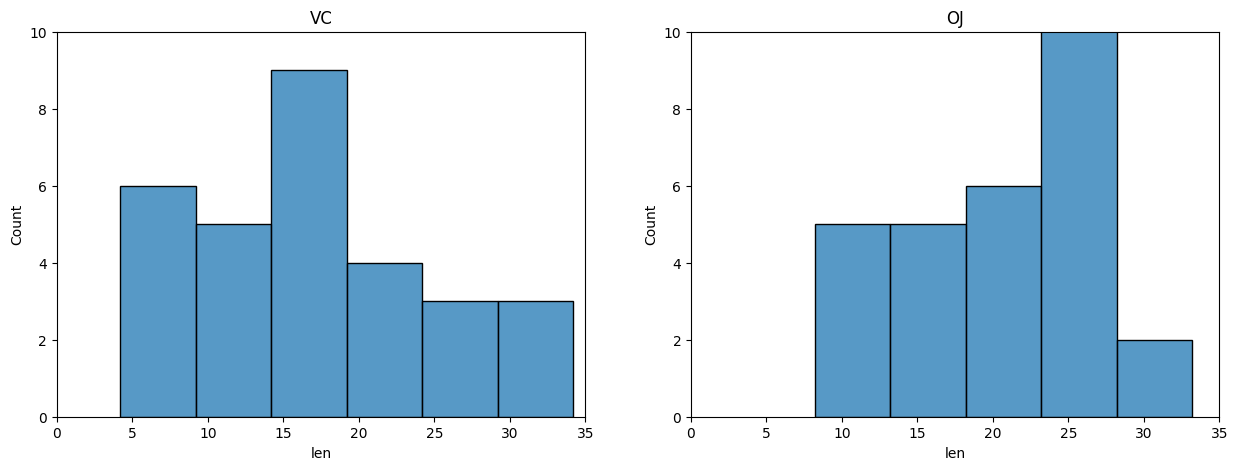

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

VC = pd.DataFrame(df.loc[df['supp'] == 'VC']['len']).reset_index(drop=True)
OJ = pd.DataFrame(df.loc[df['supp'] == 'OJ']['len']).reset_index(drop=True)

sns.histplot(VC['len'], ax = ax[0], binwidth = 5)
sns.histplot(OJ['len'], ax = ax[1], binwidth = 5)

ax[0].set_xlim(0,35) # x축 설정
ax[1].set_xlim(0,35) # x축 설정

ax[0].set_ylim(0,10) # y축 설정
ax[1].set_ylim(0,10) # y축 설정

ax[0].set_title('VC')
ax[1].set_title('OJ')
plt.show()

### 가설검정의 결과
- 귀무가설을 채택한다.
- 통계적 결론: 오렌지 주스를 투여받은 기니피그와 아스코르브산을 투여받은 기니피그의 치아 길이 평균은 통계적으로 유의한 차이가 없다.
- 두 그룹간에 유의미하게 평균 차이가 있다고 보기가 통계적으로는 어렵다.